# ZOH Transfer function

* Referance Book: digital control system anysis and design Fourth Edition
  * Autohor: 
    * Charles L. Phillips 
    * H. Troy Nagle 
    * Aranya Chakrabortty
* Referance  Chapter 3  Sampling and Reconstruction
* Page 114

ZOH same as a Step function minus step function with a delay time T   
$e_{o}(t)= u(t)-u(t-T)$   
$E_{o}(s)= \frac{1}{s}-\frac{e^{-Ts}}{s}$  
This shall multiply a amplitide $1/T$  
$E_{o}(s)= \frac{1-e^{-Ts}}{Ts}$ 


impluse input laplace  function is 1  
$E_{i}(s)=1$

$G=\frac{E_{o}{s}}{E_{i}(s)}=E_{o}(s)=\frac{1}{s}-\frac{e^{-Ts}}{s}=\frac{1-e^{-Ts}}{s}$

This shall multiply a amplitide $1/T$

$G(ZOH)=\frac{1}{T}*\frac{1-e^{-Ts}}{s}$  


$ZOH=\frac{1}{T}*\frac{1-e^{-T*s}}{s}$  
$ZOH=\frac{1}{T}*\frac{1-\frac{1}{e^{T*s}}}{s}$  
$ZOH=\frac{1}{T}*\frac{1-\frac{1}{1+T*s}}{s}$  
$ZOH=\frac{1}{T*s}*(1-\frac{1}{1+T*s})$  
$ZOH=\frac{1}{T}*\frac{1-\frac{1}{1+T*s}}{s}$  
$ZOH=\frac{1}{T}*\frac{\frac{T*s}{1+T*s}}{s}$  
$ZOH=\frac{1}{1+Ts}$  


ZOH can be treate as a delay with T 

~~A commonly used method of data reconstruction is polynomial extrapolation.  
Using a Taylor’s series expansion about t = nT, we can express e(t) as~~ 

~~$e(t)=e(n*t)+e(n*t)'(t-n*t)+\frac{e(n*t)''(t-n*t)^2}{2!}+\cdots $~~


$e_{n}(t)\cong e(t)$ for $n*T\leq t<(n+1)T$


$e_{n}(t)= e(n*t)$ for $n*T\leq t<(n+1)T$

## Chapter 1

In [6]:
import sympy as sym
sym.init_printing() # enables pretty printing for formulas

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
# svg retina

# from sympy.physics.control.control_plots import ramp_response_numerical_data
# from sympy.abc import s
import numpy as np
import control as ct
import math


In [7]:
s=ct.TransferFunction.s
# with different T,we can check the output response
ZOH_freq=1e4
T=1/ZOH_freq
#python control don't support e^(-Ts) define in transfer function
#but matlab can
# ZOH=(1/T)*(1-math.e**(-T*s))/s
ZOH=(1/T)*(1-1/(1+T*s))/s
ZOH
ZOH2=(1-1/(1+T*s))/s
ZOH2

TransferFunction(array([1., 0.]), array([1.e-04, 1.e+00, 0.e+00]))

TransferFunction(array([0.0001, 0.    ]), array([1.e-04, 1.e+00, 0.e+00]))

<Figure size 1080x720 with 0 Axes>

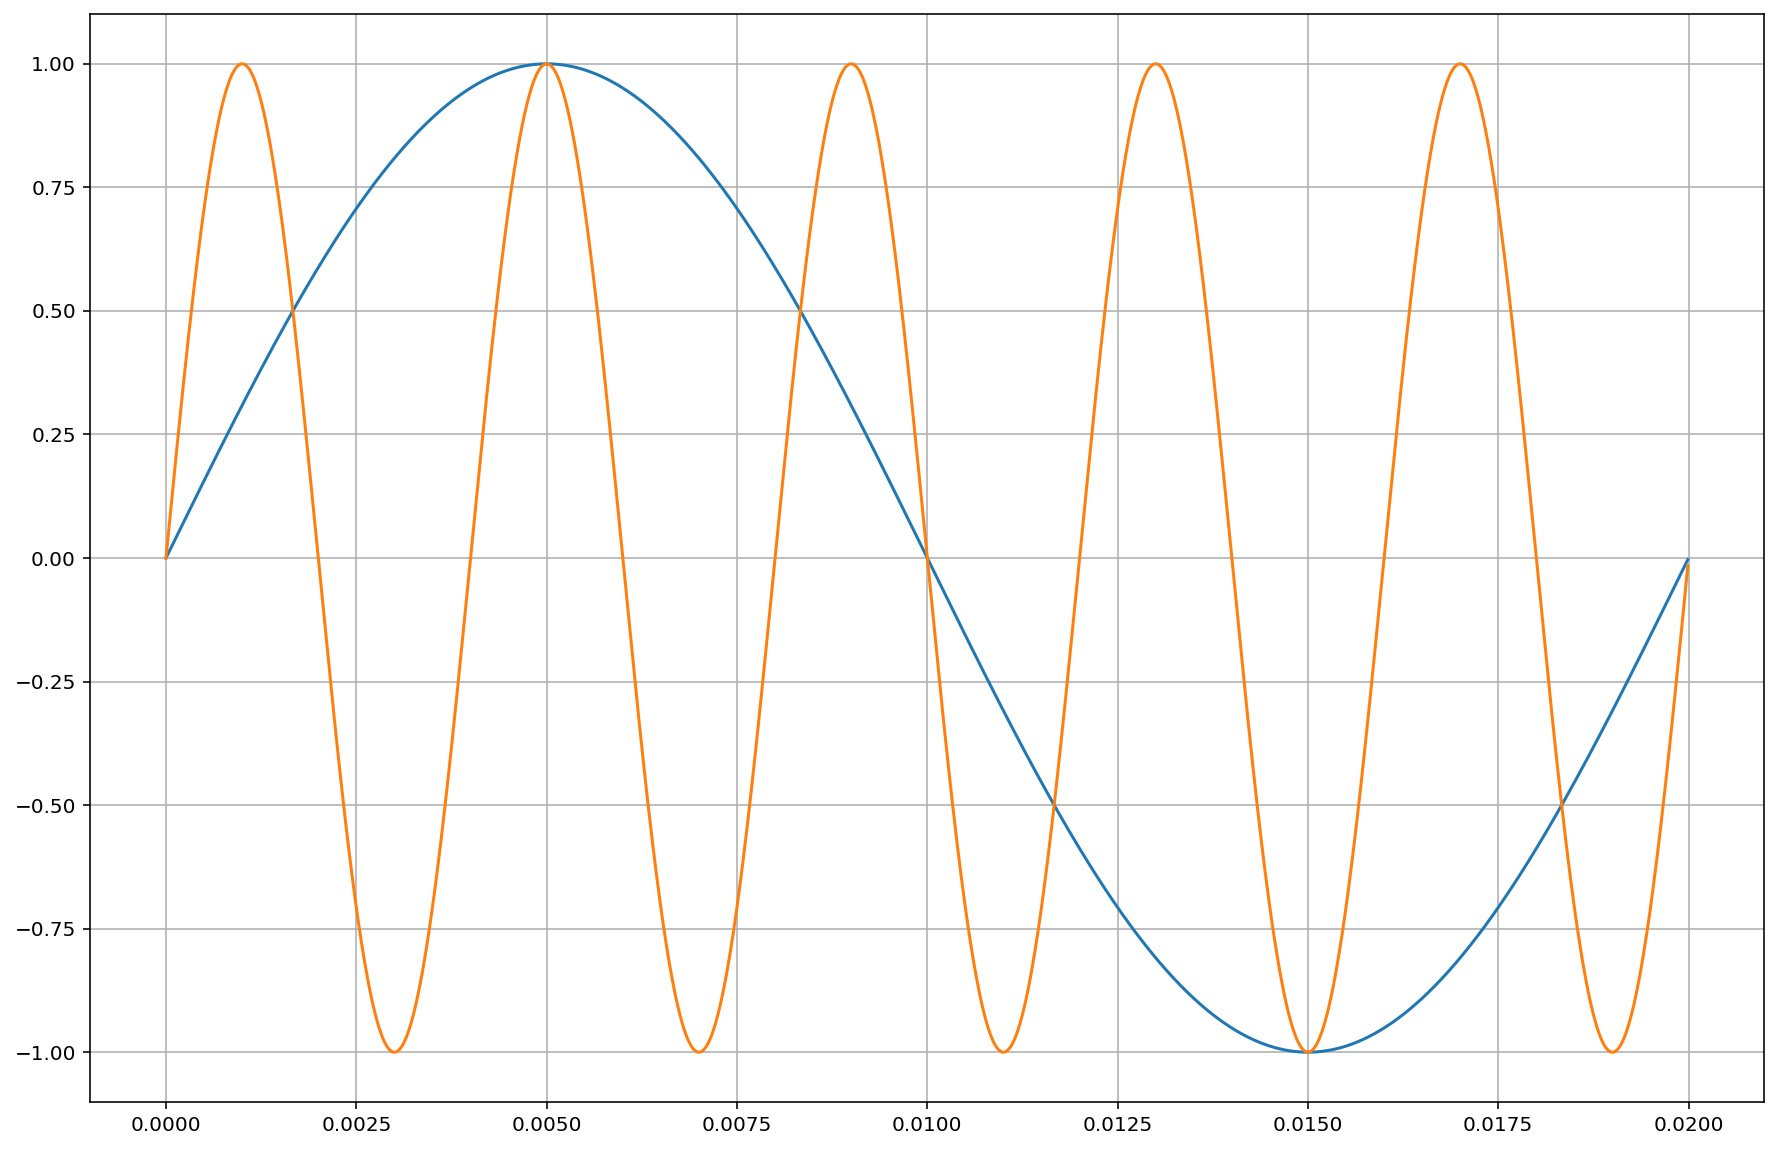

In [8]:
# set up simulation time
t_start=0
t_stop=0.02
# define the sample frequency
freq=100000
t_step=1/freq
# t_step=0.00001
# t_lim_left=6
# t_lim_right=7
# t_axvline=6.25
# t_number=1000
# t1=np.linspace(t_start,t_stop,t_number)
# t1
# setup simulation input signal
freq1=50
freq2=250
t=np.arange(t_start,t_stop,t_step)
u1=np.sin(2*np.pi*freq1*t)
u2=np.sin(2*np.pi*freq2*t)

plt.figure(figsize=(15,10))
plt.plot(t,u1)

plt.plot(t,u2)
plt.grid()


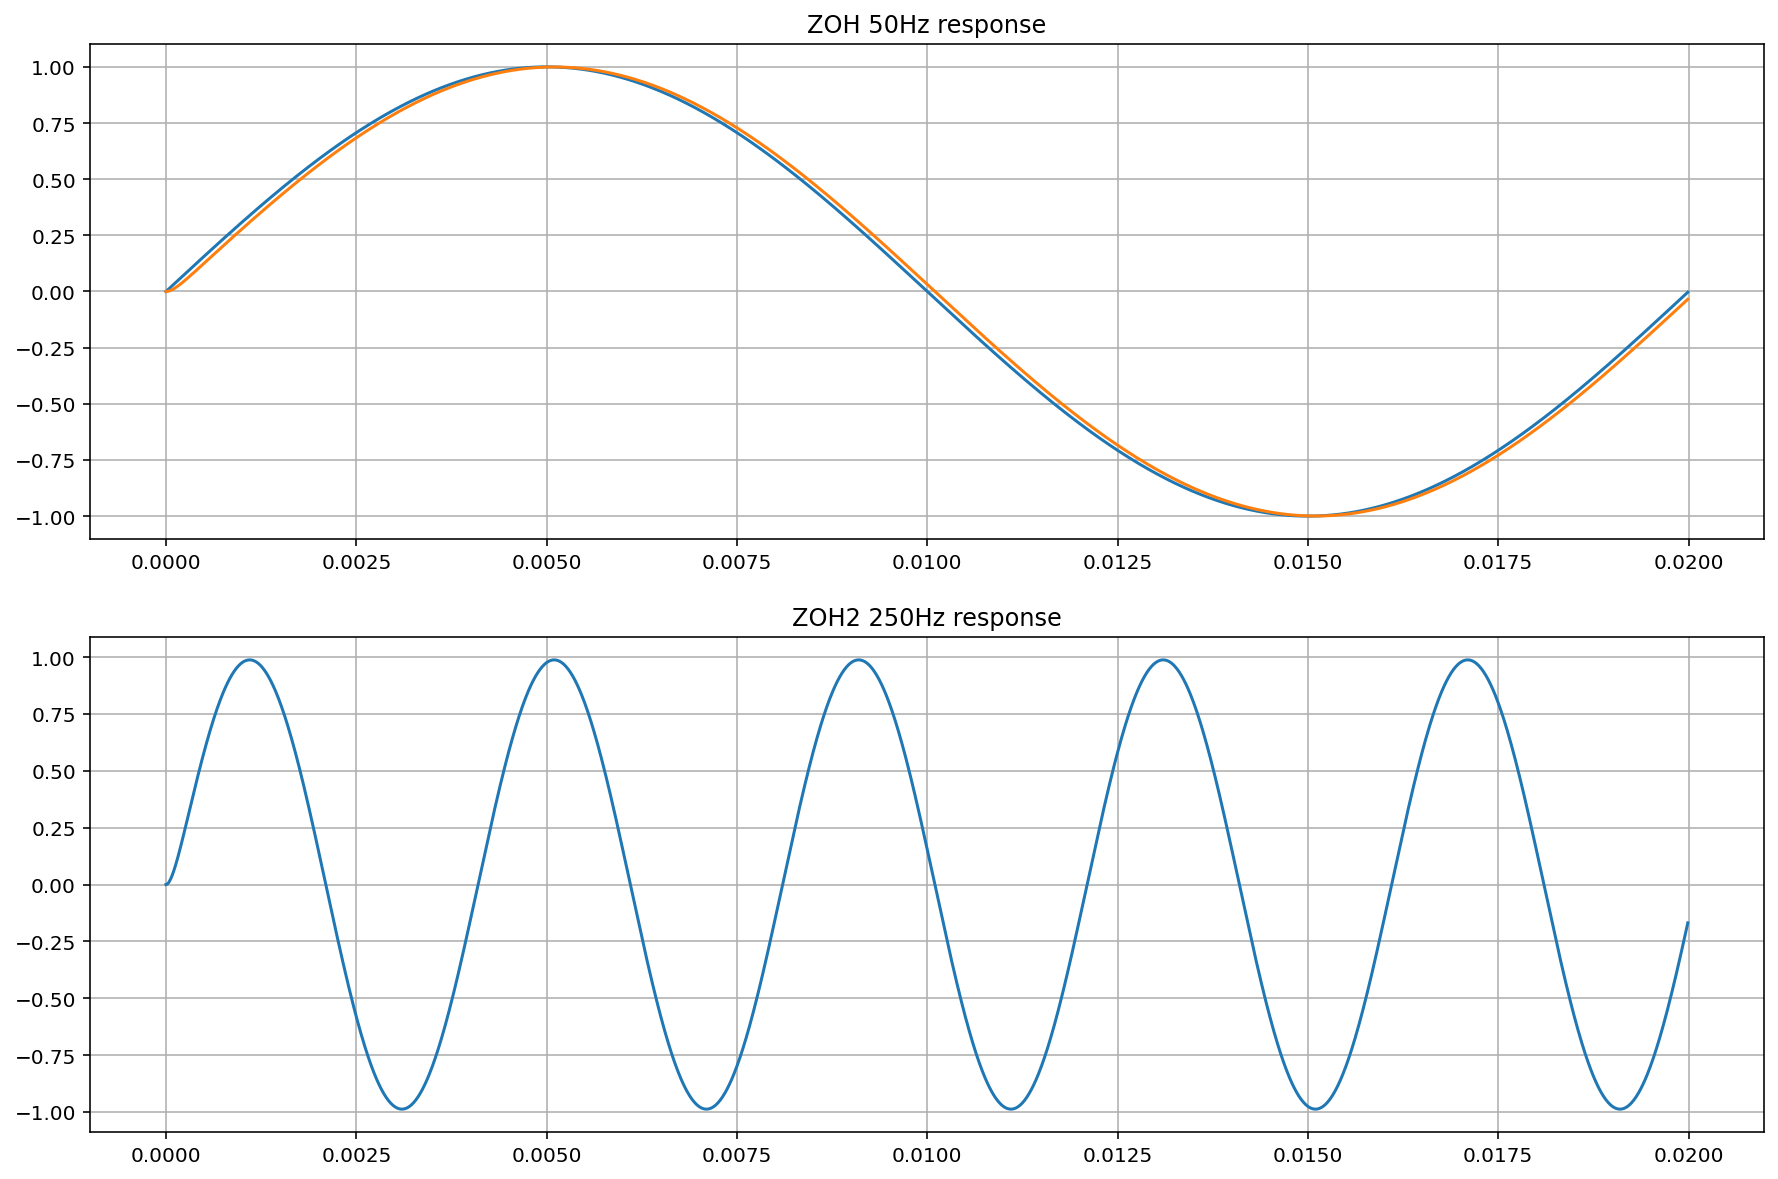

In [9]:

# Calculation transfer response
T, y1 = ct.forced_response(ZOH, t, u1, 0)
# t,y=ct.input_output_response(G,t,sin,0)
T, y2 = ct.forced_response(ZOH, t, u2, 0)
# t,y=ct.input_output_response(G,t,sin,0)

# plt.axvline(t_axvline)
# plt.axvline(t_axvline+t_s)
# plt.xlim(t_lim_left,t_lim_right)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(t,u1,label='u1')
plt.plot(t,y1)
plt.grid()
plt.title("ZOH 50Hz response")
plt.subplot(2,1,2)
plt.plot(t,y2)
plt.title("ZOH2 250Hz response")
plt.grid(True)
# add a ; to avoid <matplotlib.lines.Line2D> show in jupyter
plt.show();

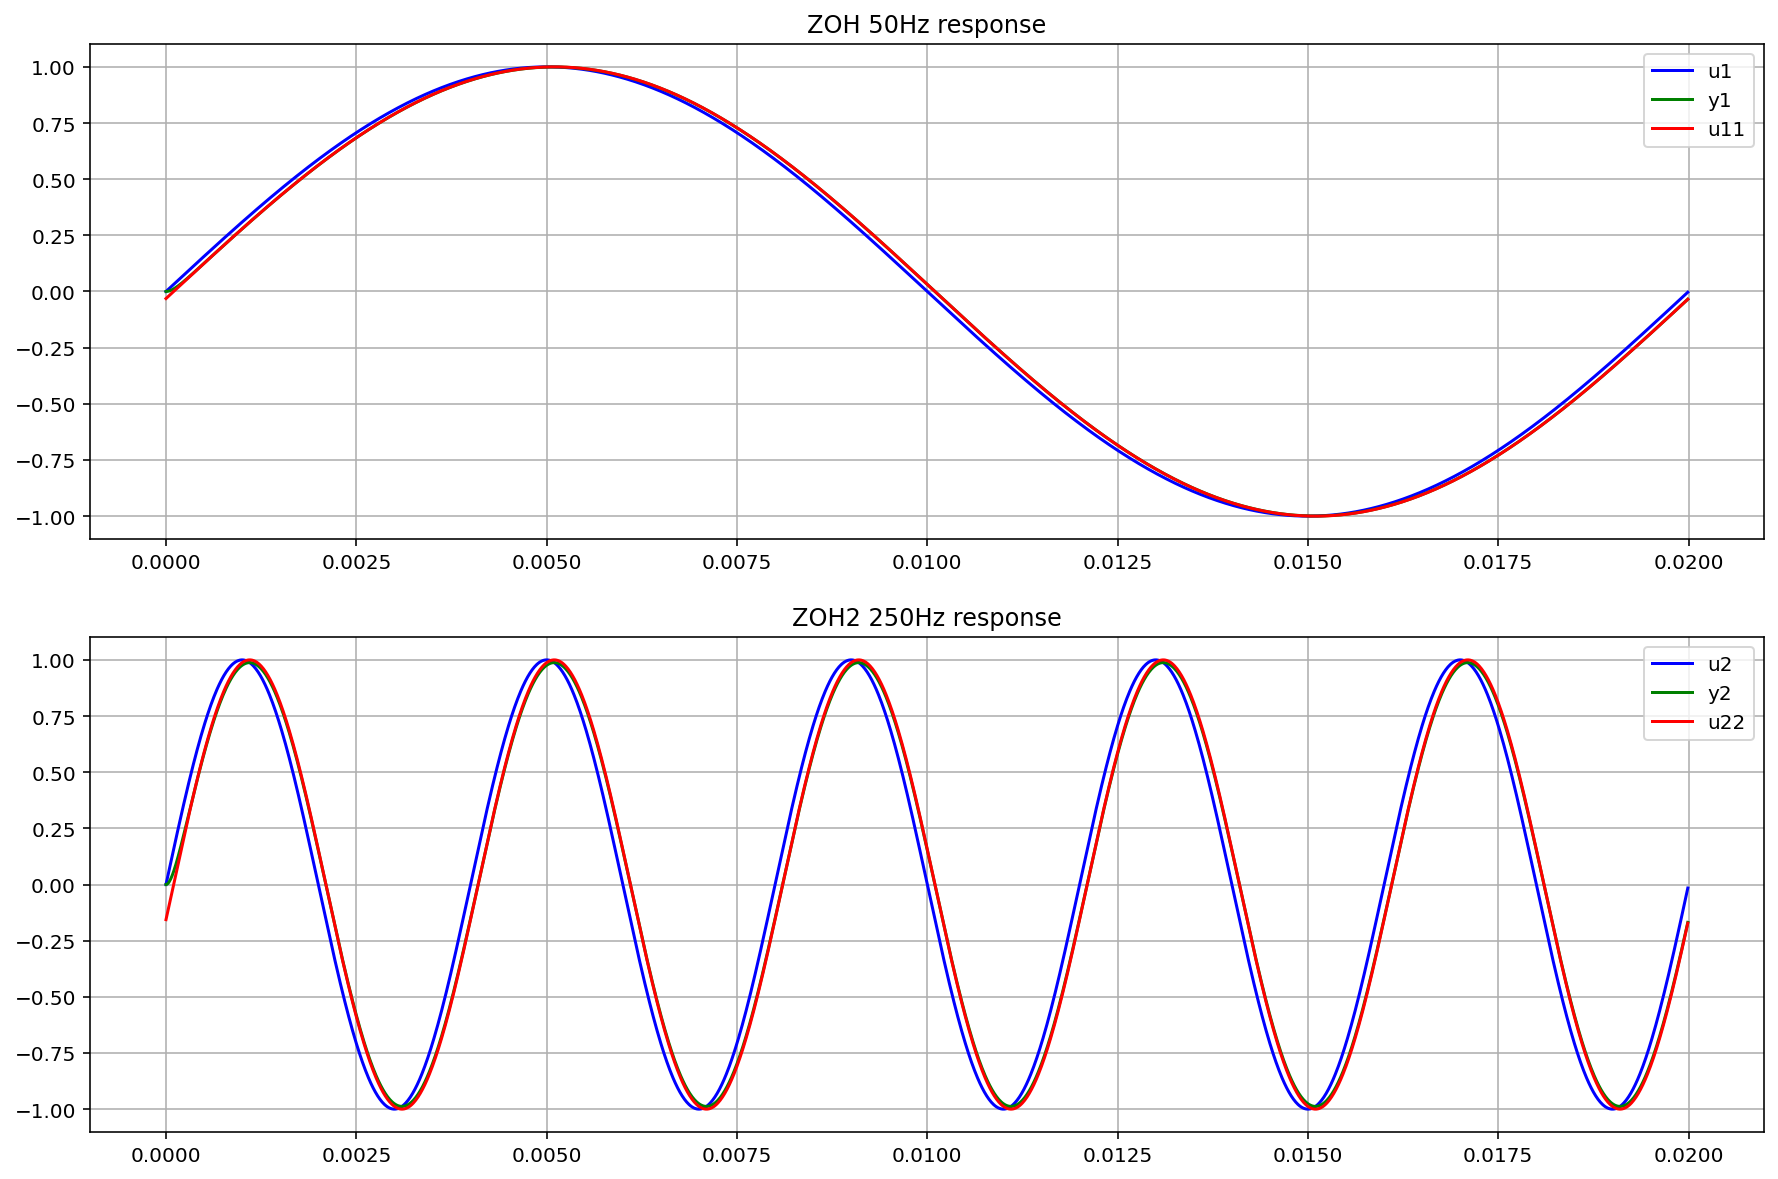

In [10]:
# s=ct.TransferFunction.s
# with different T,we can check the output response
ZOH_freq=1e4
T=1/ZOH_freq
#python control don't support e^(-Ts) define in transfer function
#but matlab can
# ZOH=(1/T)*(1-math.e**(-T*s))/s
ZOH=(1/T)*(1-1/(1+T*s))/s
ZOH

# set up simulation time
t_start=0
t_stop=0.02
# define the sample frequency
freq=100000
t_step=1/freq
# t_step=0.00001
# t_lim_left=6
# t_lim_right=7
# t_axvline=6.25
# t_number=1000
# t1=np.linspace(t_start,t_stop,t_number)
# t1
# setup simulation input signal
freq1=50
freq2=250
t=np.arange(t_start,t_stop,t_step)
u1=np.sin(2*np.pi*freq1*t)
u2=np.sin(2*np.pi*freq2*t)

# defin a signal with T delay compare to input
u11=np.sin(2*np.pi*freq1*(t-T))
u22=np.sin(2*np.pi*freq2*(t-T))

T, y1 = ct.forced_response(ZOH, t, u1, 0)
# t,y=ct.input_output_response(G,t,sin,0)
T, y2 = ct.forced_response(ZOH, t, u2, 0)

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(t,u1,label='u1',color='b')
plt.plot(t,y1,label='y1',color='g')
plt.plot(t,u11,label='u11',color='r')
plt.legend()
plt.grid()
plt.title("ZOH 50Hz response")

plt.subplot(2,1,2)
plt.plot(t,u2,label='u2',color='b')
plt.plot(t,y2,label='y2',color='g')
plt.plot(t,u22,label='u22',color='r')
plt.legend()
plt.title("ZOH2 250Hz response")
plt.grid(True)
# add a ; to avoid <matplotlib.lines.Line2D> show in jupyter
plt.show();

## bode plot

TransferFunction(array([1]), array([2.5e-04, 1.0e+00]))

TransferFunction(array([0.00025]), array([2.5e-04, 1.0e+00]))

<Figure size 1080x720 with 0 Axes>

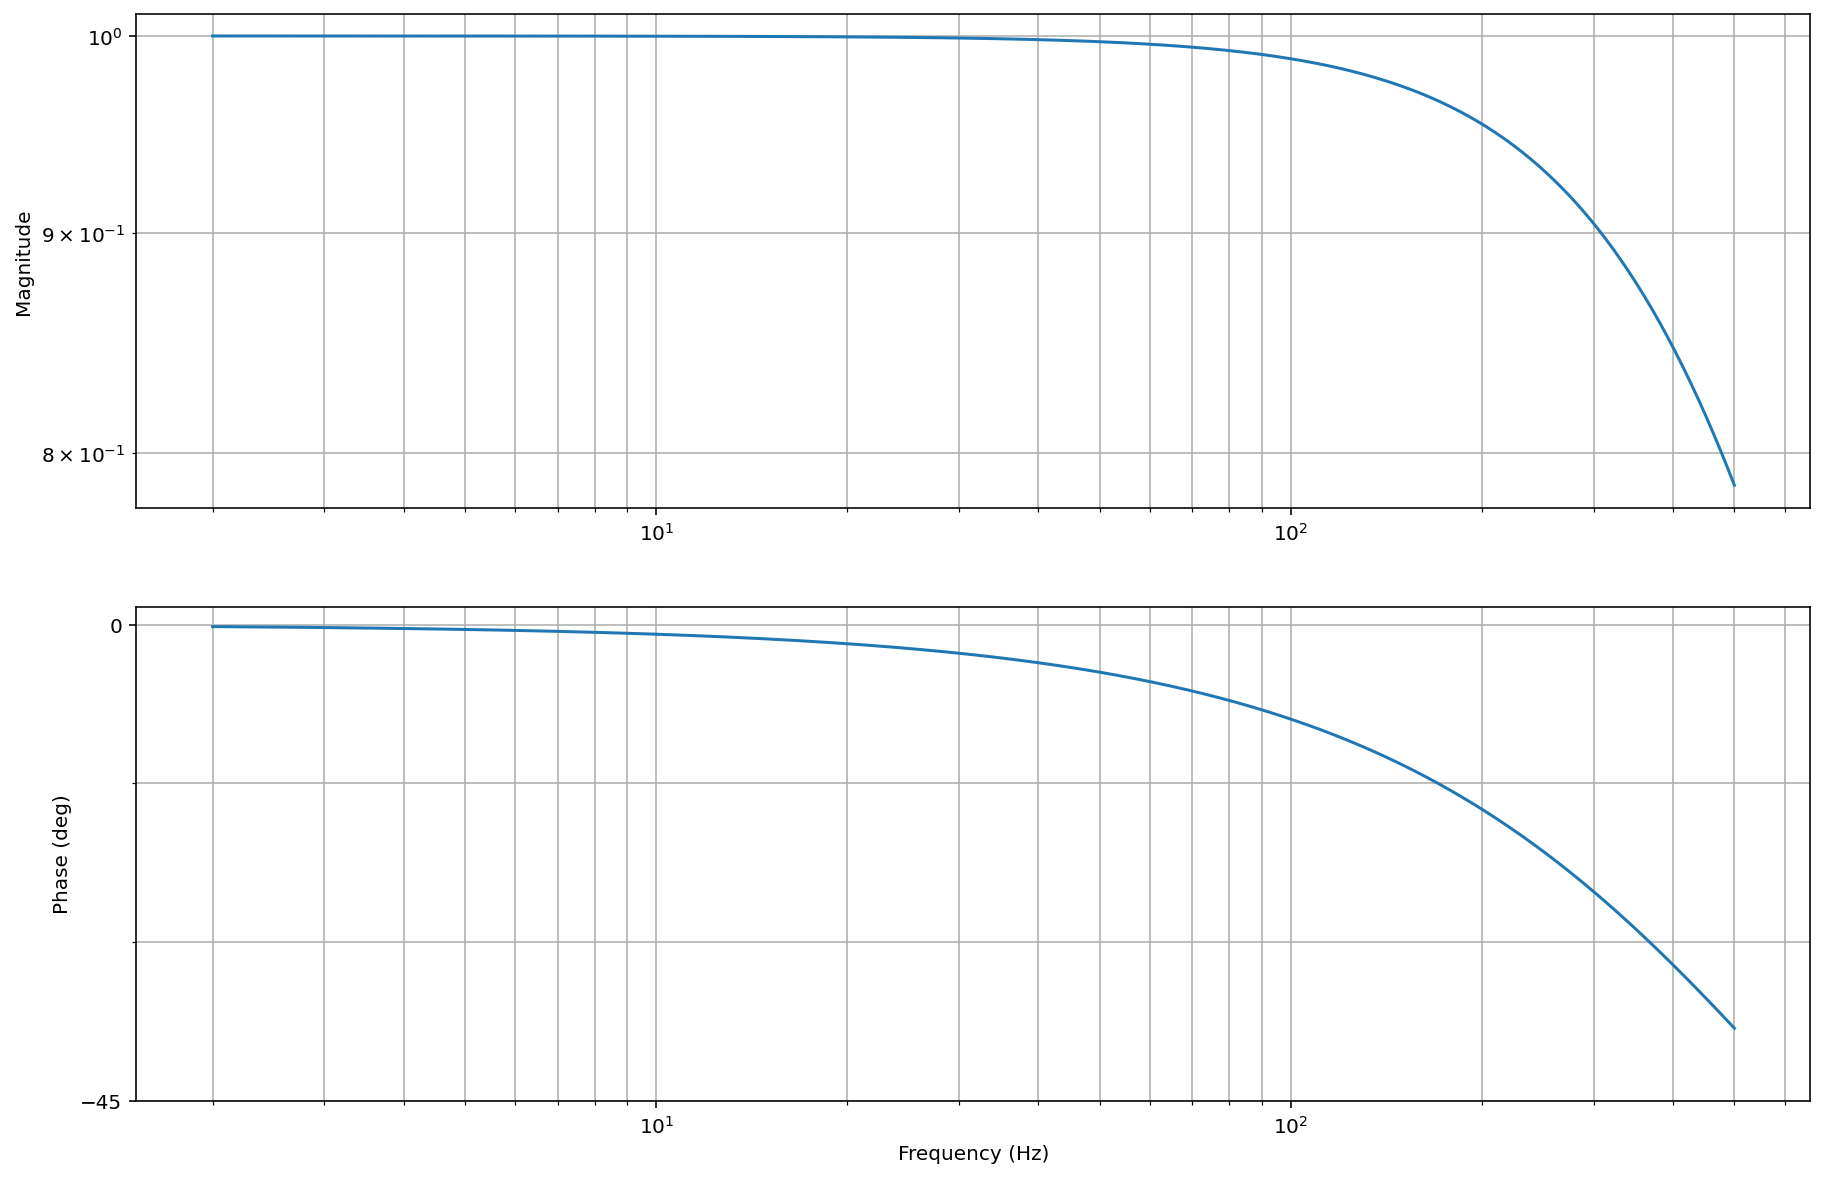

In [11]:
T=1/4e3
ZOH=1/(1+T*s)
ZOH
ZOH2=T/(1+T*s)
ZOH2
#use sample frequency 4KHz to sampe a frequency range in 2~500Hz ,Bode plot as below
# Omega range define in Hz
omega_Range_Hz_min=2
omega_Range_Hz_max=500
omega_Range_rad=[2*np.pi*omega_Range_Hz_min,2*np.pi*omega_Range_Hz_max]
plt.figure(figsize=(15,10))
omega,mag,phase=ct.bode_plot(ZOH,Hz ='True',omega_limits=omega_Range_rad)
gm, pm, wcg, wcp = ct.margin(ZOH)
gm 
pm 
wcg
wcp

## Chapter 1

### define a transfer function full pass system without delay

In [12]:
num=[1]
den=[1]
G=ct.tf(num,den)
G

TransferFunction(array([1]), array([1]))

<Figure size 1080x720 with 0 Axes>

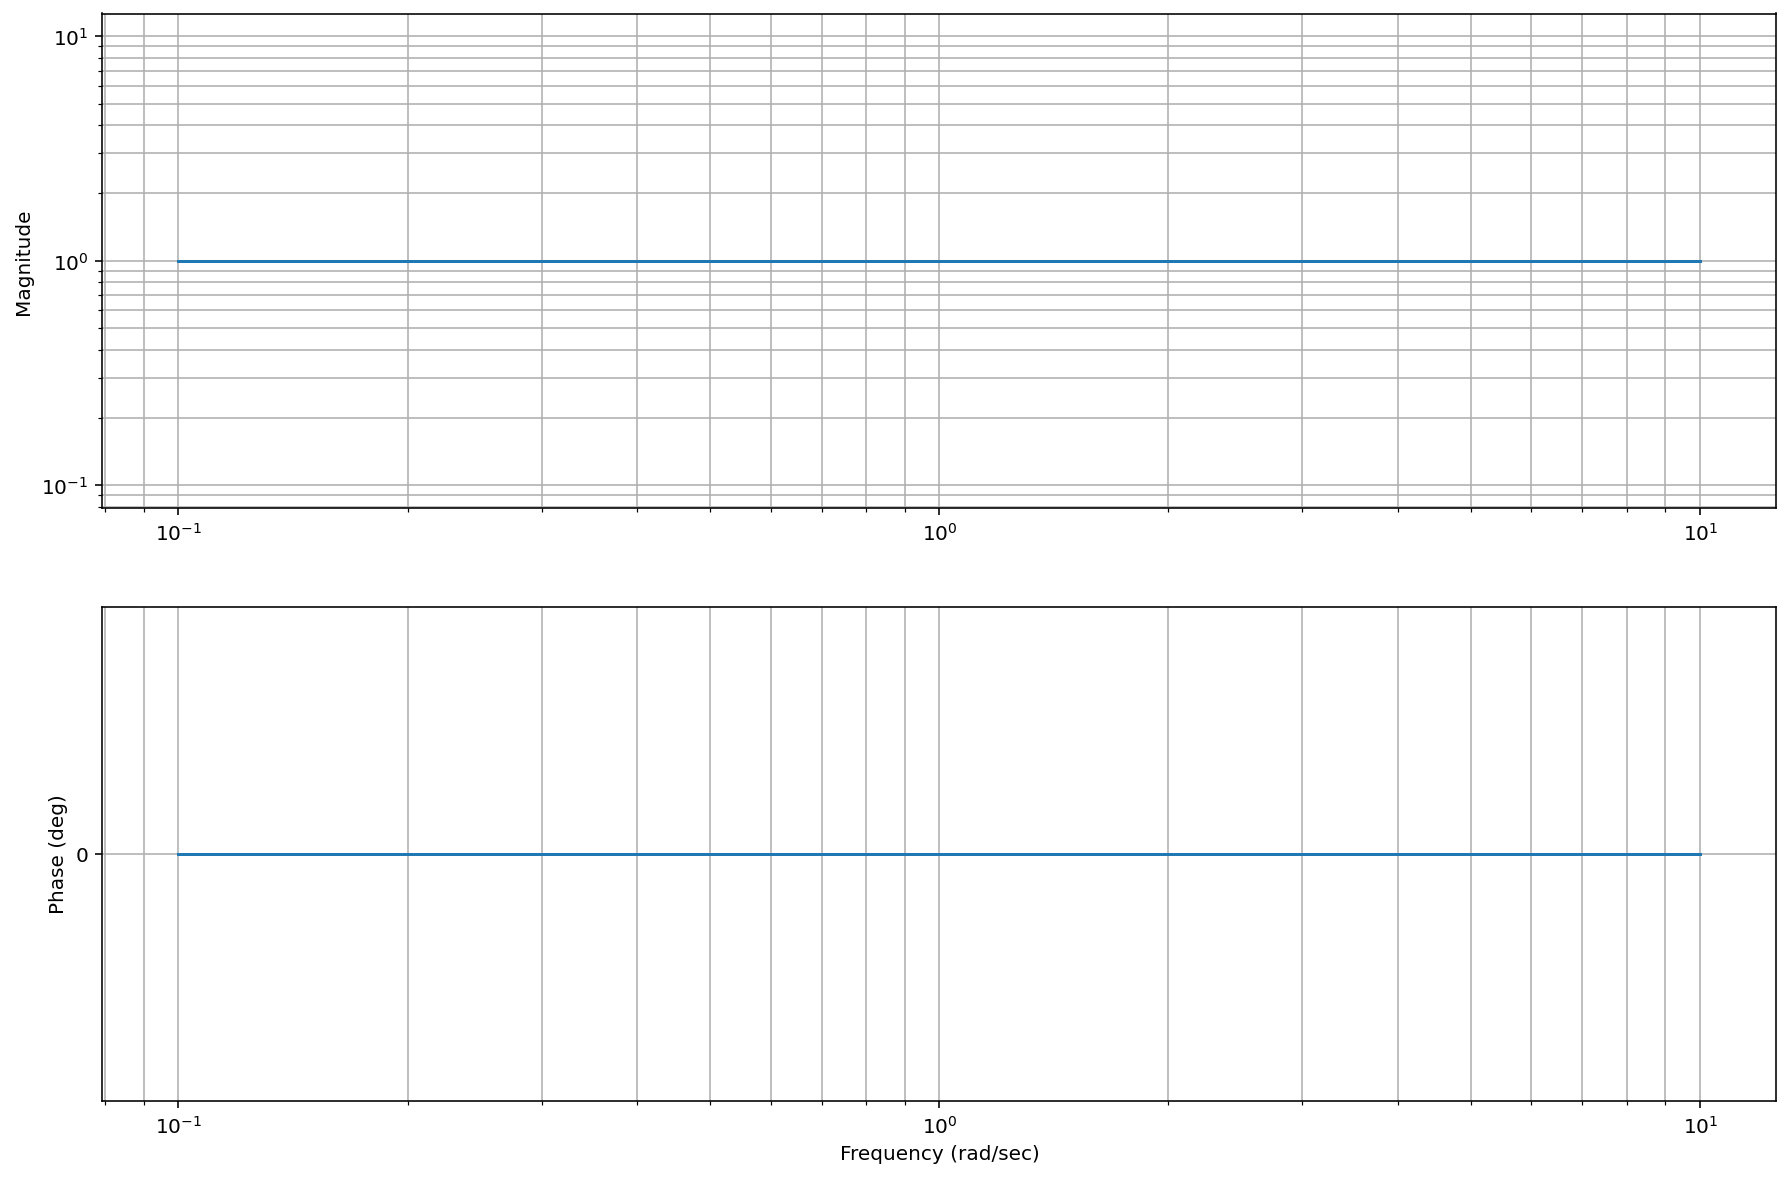

In [13]:
plt.figure(figsize=(15,10))
mag, phase, omega =ct.bode_plot(G)

In [14]:
# 'zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse'
ZOH_T=0.01
ZOH=ct.c2d(G, ZOH_T, method='zoh')
ZOH

TransferFunction(array([ 1., -1.]), array([ 1., -1.]), 0.01)

<Figure size 1080x720 with 0 Axes>

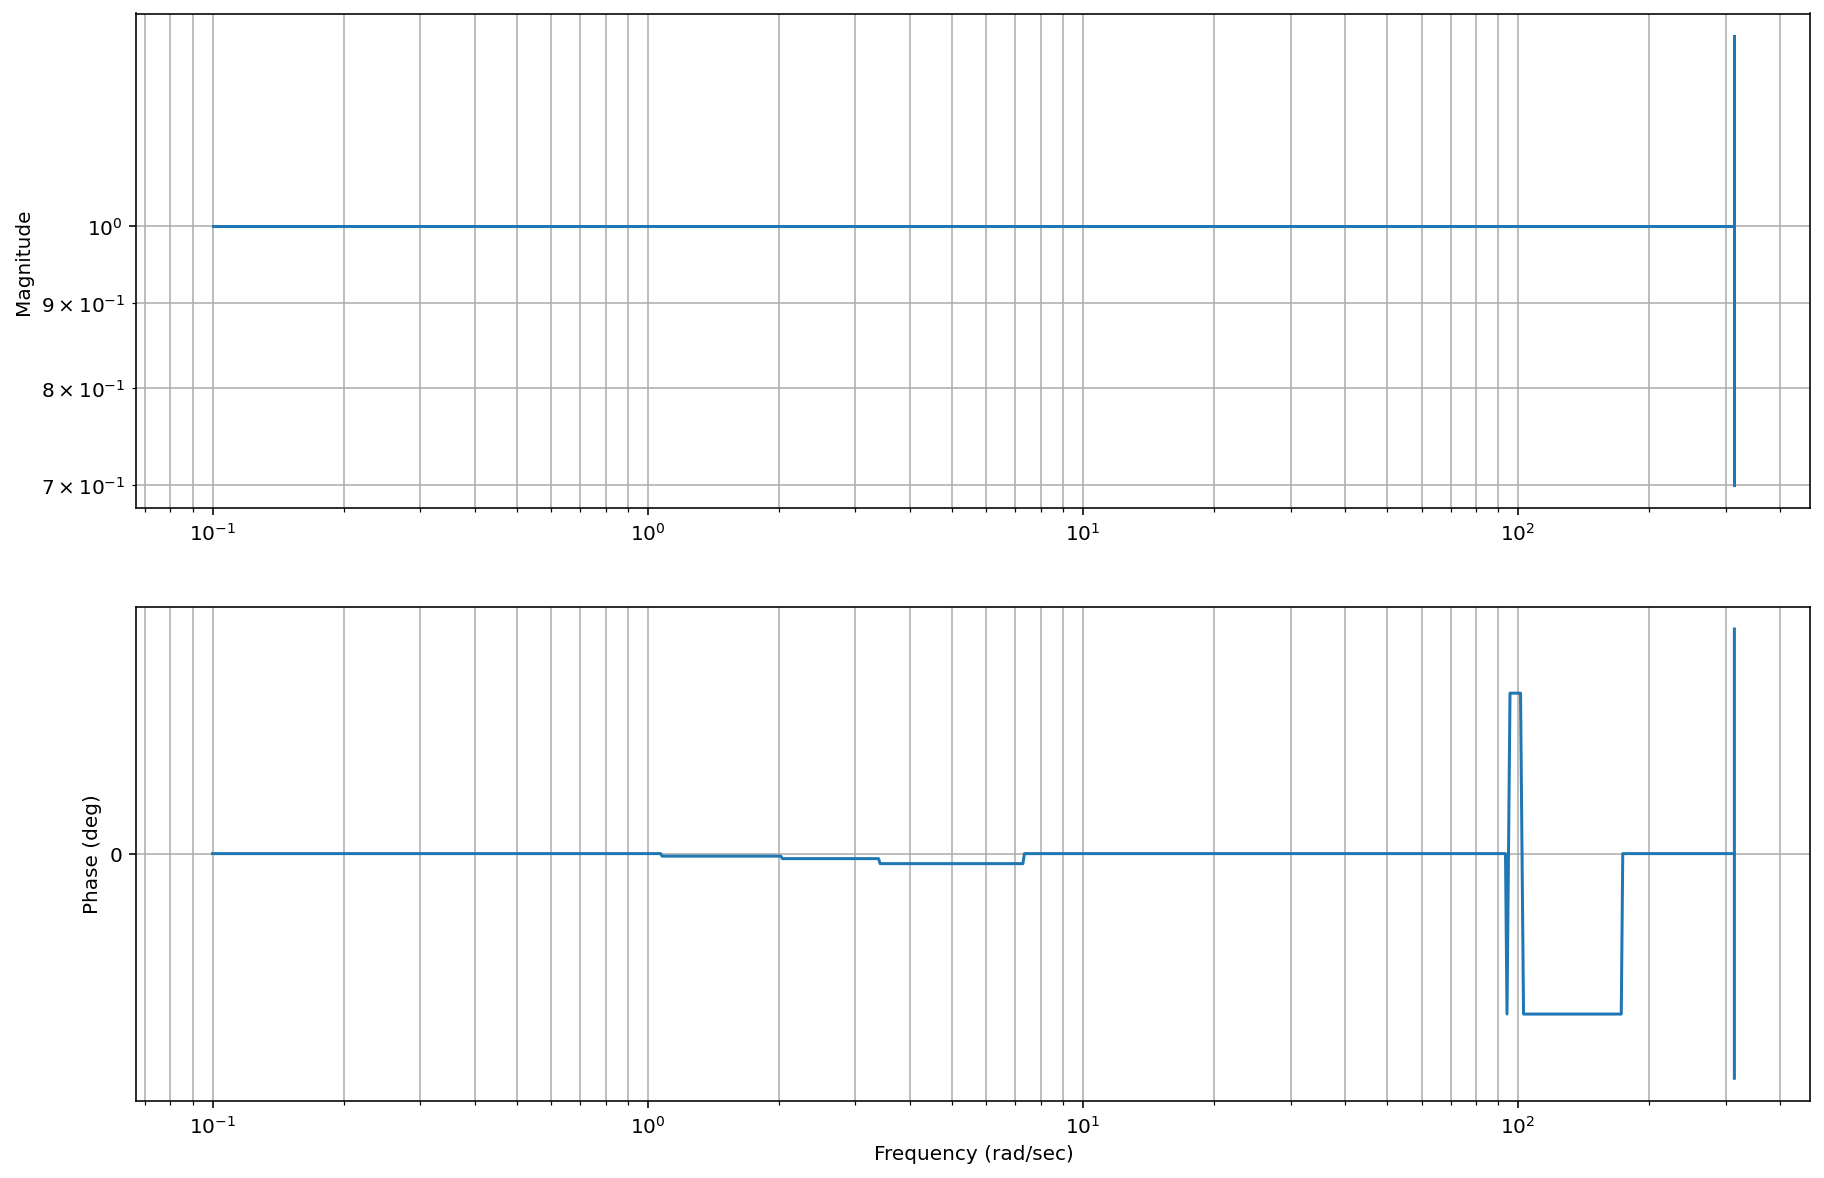

In [15]:
plt.figure(figsize=(15,10))
mag, phase, omega =ct.bode_plot(ZOH)

## ZOH Bode

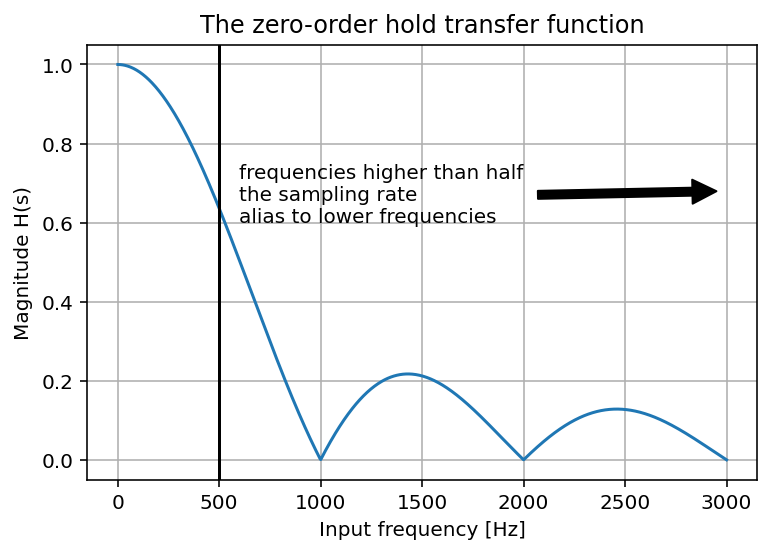

In [18]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(1, 3000, 1000)
w = 2*np.pi*f
s = 1j*w
T = 0.001
H_s = (1-np.exp(-s*T))/(s*T)
mag = np.abs(H_s)
phase = np.angle(H_s, deg=True)

plt.plot(f, mag)
plt.axvline(x=500, color='k')
plt.annotate('frequencies higher than half\nthe sampling rate\nalias to lower frequencies', 
             xy=(3000,0.68), xytext=(600, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Input frequency [Hz]')
plt.ylabel('Magnitude H(s)')
plt.title('The zero-order hold transfer function')
plt.grid()
plt.show();